In [2]:
import torch

In [106]:
x = torch.tensor((2,2)) # Uninitialized (garbage value present in memory)
y = torch.rand(3,3) # Random initialization
print(x)
print(y)

tensor([2, 2])
tensor([[0.3365, 0.4247, 0.2254],
        [0.1397, 0.4271, 0.0295],
        [0.1305, 0.7501, 0.4680]])


In [45]:
y.size(1)

3

In [115]:
y[1,1].item()

0.4270849823951721

In [51]:
len(y[:,1:])

3

In [64]:
y_ar = y.numpy()
print(type(y_ar[1,1]))
y_ar[1]

<class 'numpy.float32'>


array([0.56161445, 0.94394696, 0.92317   ], dtype=float32)

In [58]:
import numpy as np
# Converting from numpy to tensor
x_np = np.ones((3,3))
x_py = torch.from_numpy(x_np)

In [62]:
type(x_np[1,1])

numpy.float64

In [66]:
type(x_py.numpy()[1,1])

numpy.float64

In [72]:
# Improving computational time with GPU acceleration
import time
x = torch.randn(10000,10000)
cpuStart = time.time()
y = x*x
cpuEnd = time.time()-cpuStart
print('CPU computation completed in {:.6f}s'.format(cpuEnd))

CPU computation completed in 0.393758s


### grad

In [91]:
from torch.autograd import Variable
a = torch.ones(2,2)
a_var = Variable(a,requires_grad=True)
print(a_var)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [92]:
b = a_var+2
c = b*b*3
d = c.mean()
print(b)
print(c)
print(d)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward1>)


In [93]:
d.backward()
print(d.grad)
print(c.grad)
print(b.grad)
print(a_var.grad)

None
None
None
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
tensor([[1., 1.],
        [1., 1.]])


### Datasets

In [94]:
%matplotlib inline
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [95]:
apply_transform = transforms.Compose([transforms.ToTensor()])
trainDset = datasets.MNIST('./MNIST',train=True, download=True, transform= apply_transform)
testDset = datasets.MNIST('./MNIST',train=False, download=True, transform= apply_transform)

Processing...
Done!


In [96]:
len(trainDset), len(testDset)

(60000, 10000)

Label: 9


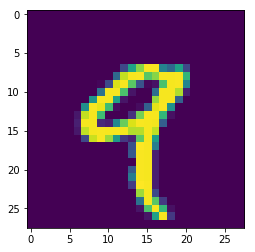

In [116]:
# Displaying sample image from the dataset
img = trainDset[4][0].numpy().transpose(1,2,0).squeeze(2)
plt.imshow(img)
print('Label: '+str(trainDset[4][1].item()))

In [117]:
# Creating dataloader for loading data in batches
trainLoader = torch.utils.data.DataLoader(trainDset, batch_size=10, shuffle=True, num_workers=1, pin_memory=False)
testLoader = torch.utils.data.DataLoader(testDset, batch_size=10, shuffle=True, num_workers=1, pin_memory=False)

### MLP